> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# VIII:  Neural Networks

### *Assignement Instructions:*
- **Due date**: 11 PM, Dec. 10, 2021
- **File name**: ID_Name_HW8.ipynb
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[2017142047] [한민규]</span>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-12-07 15:30:18.147459


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Problem statement

We will implement a simple neural network for classification. Let's first see how a simple logistic regression method works on the $\text{moon}$ dataset. This dataset has been widely used to evaluate performance of a nonlinear classifier or clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [ ]:
from project8 import *

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [ ]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

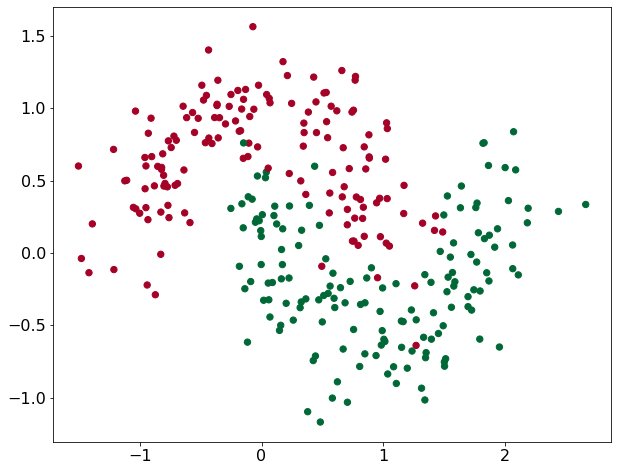

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)


It seems hard to classify samples in the dataset using linear classifiers such as a logistic regression method. That is, drawing a straight line (i.e., decision boundaries) to divide training samples into two different regions is not feasible. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [ ]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use the help function ($\texttt{plot_decision_boundary}$) that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers, e.g., the output value of the sigmoid function in case of logistic regression. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are the training dataset and color for each label in the dataset, respectively. See the example below.

In [ ]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

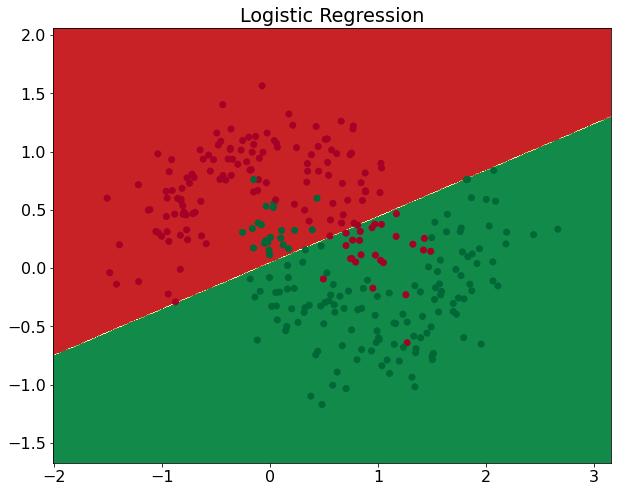

In [ ]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X_train, color = y_train)
plt.title("Logistic Regression")

In [ ]:
X_train.shape

(300, 2)

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a nonlinear classifier with a simple neural network, and apply it to classify samples in the $\texttt{moon}$ dataset. The neural network we will implement consists of series of fully connected layers followed by nonlinear activation functions. 

### P1. Implement Neural networks using gradiend descent.
P1.1 Implement a multilayer perceptron method (```class NeuralNetwork```) using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. (*50 points*)

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = \sigma(H_1)$ where $\sigma$ is a sigmoid function unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = tanh(H_2)$ where $\tanh$ is a tanh function and $z_2$ is an output of the second hidden layer.    
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > **$W$** and **$b$** are weights and bias, respectively.    
 > **Initialization for weight**: Standard normal (use $\texttt{np.random.randn}$.)  
 > **Initialization for bias (intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 2   
 > **Regularization coefficient $\lambda$**: 0.001  
 > **Loss function**: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 if the training sample belongs to the class $k$ and 0 otherwise.   
 > **Total loss** : summation of above for all training samples and L2 normalization loss   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)} +  \lambda \|W\|^2 $
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.  
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.001  
 > **Number of epochs** = 50000

### P2. A modular approach to implementing Neural networks

P2.1 Implement ```class Linear```, ```class ReLU```, ```class Tanh```, ```class Sigmoid``` and ```class NeuralNetwork_module``` (*30 points*).

We will implement a multilayer perceptron method with modular functions, similar to the generic deep learning libraries such as `PyTorch` and `TensorFlow`.  To perform classification using ```class NeuralNetwork_module```, we define `forward` and `backward` operations for each layer (e.g., ReLu layer, linear layer (y=Wx), Tanh layer, or sigmoid layer), whose inputs and ouputs are matrices. Note that a linear layer (```Linear``` class) also inputs an additinal weight matrix. Note also that we should chche data needed for a backward pass in `forward` operations.


Please see the description for `forward` and `backward` operations in the linear layer (```class Linear```) below.
```python
class Layer(Object):
    @staticmethod
    def forward(x):
      """ Receive inputs x and weights w """
      # Do some computations ...
      z = # ... some intermediate value
      # Do some more computations ...
      out = # the output

      cache = (x, out) # Values we need to compute gradients

      return out, cache

    @staticmethod
    def backward(dout, cache):
      """
      Receive dout (derivative of loss with respect to outputs) and cache,
      and compute derivative with respect to inputs.
      """
      # Unpack cache values
      x, out = cache
    
      # Use values in cache to compute derivatives
      dx = # Derivative of loss with respect to x
     
      return dx
```




### P1.1

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 36.715528315721826
Loss (epoch 2000): 31.308819857225608
Loss (epoch 3000): 29.123652284163537
Loss (epoch 4000): 27.319145082659006
Loss (epoch 5000): 25.991801287363035
Loss (epoch 6000): 25.133373395717012
Loss (epoch 7000): 24.44998020446532
Loss (epoch 8000): 23.87235611851974
Loss (epoch 9000): 23.354538611810906
Loss (epoch 10000): 22.860559590078612
Loss (epoch 11000): 22.356926305849463
Loss (epoch 12000): 21.799365141436454
Loss (epoch 13000): 21.187849719764532
Loss (epoch 14000): 20.59621530731804
Loss (epoch 15000): 20.31490956356081
Loss (epoch 16000): 19.76576091585595
Loss (epoch 17000): 19.257464870948688
Loss (epoch 18000): 18.76029759268111
Loss (epoch 19000): 18.267310407830827
Loss (epoch 20000): 17.779053873705326
Loss (epoch 21000): 17.30741596712345
Loss (epoch 22000): 16.874716227385303
Loss (epoch 23000): 16.4996859681742
Loss (epoch 24000): 16.148949842619317
Loss (epoch 25000): 15.815413459337883
Loss (epoch 26000): 15.496248693910136
Loss

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

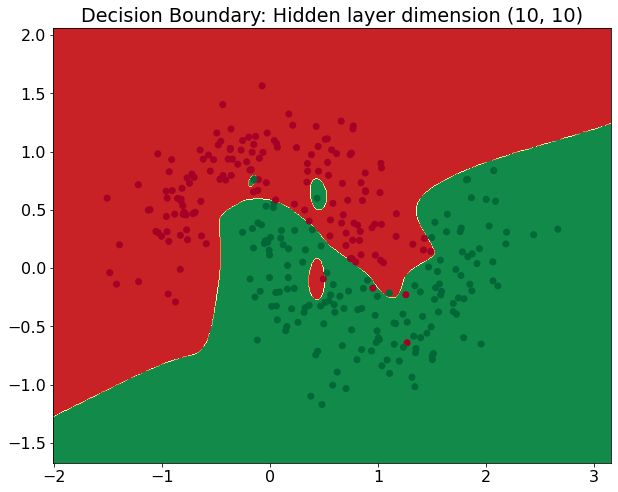

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

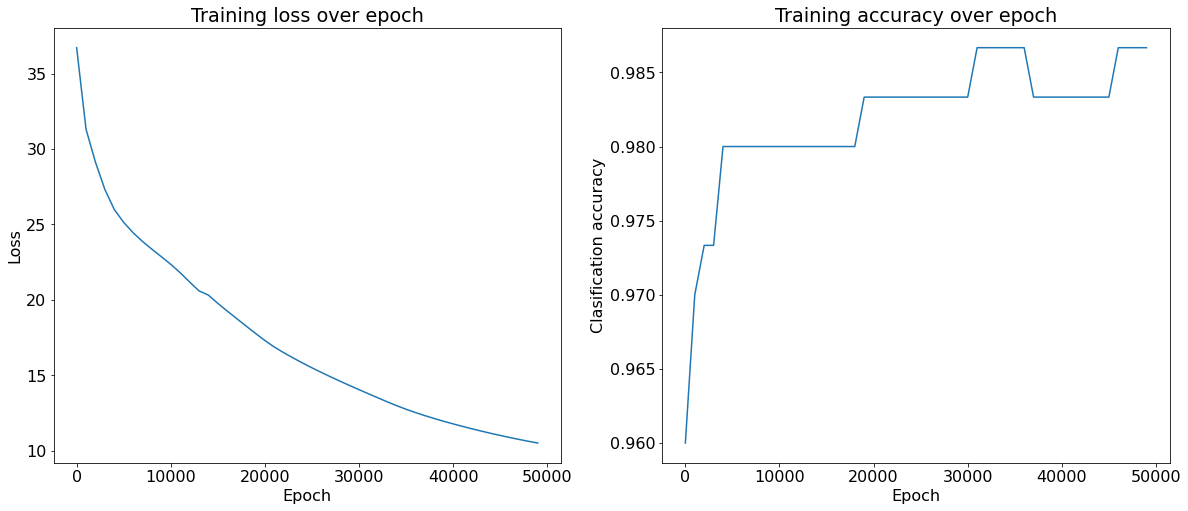

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

### P2.1

In [ ]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 36.71552831572182
Loss (epoch 2000): 31.30881985722562
Loss (epoch 3000): 29.123652284163555
Loss (epoch 4000): 27.319145082659006
Loss (epoch 5000): 25.991801287363053
Loss (epoch 6000): 25.133373395717015
Loss (epoch 7000): 24.449980204465326
Loss (epoch 8000): 23.872356118519754
Loss (epoch 9000): 23.354538611810895
Loss (epoch 10000): 22.86055959007861
Loss (epoch 11000): 22.35692630584947
Loss (epoch 12000): 21.79936514143645
Loss (epoch 13000): 21.18784971976452
Loss (epoch 14000): 20.59621530731802
Loss (epoch 15000): 20.31490956356081
Loss (epoch 16000): 19.765760915855953
Loss (epoch 17000): 19.257464870948695
Loss (epoch 18000): 18.760297592681113
Loss (epoch 19000): 18.267310407830816
Loss (epoch 20000): 17.779053873705326
Loss (epoch 21000): 17.307415967123447
Loss (epoch 22000): 16.8747162273853
Loss (epoch 23000): 16.499685968174198
Loss (epoch 24000): 16.148949842619306
Loss (epoch 25000): 15.815413459337877
Loss (epoch 26000): 15.496248693910136
Loss 

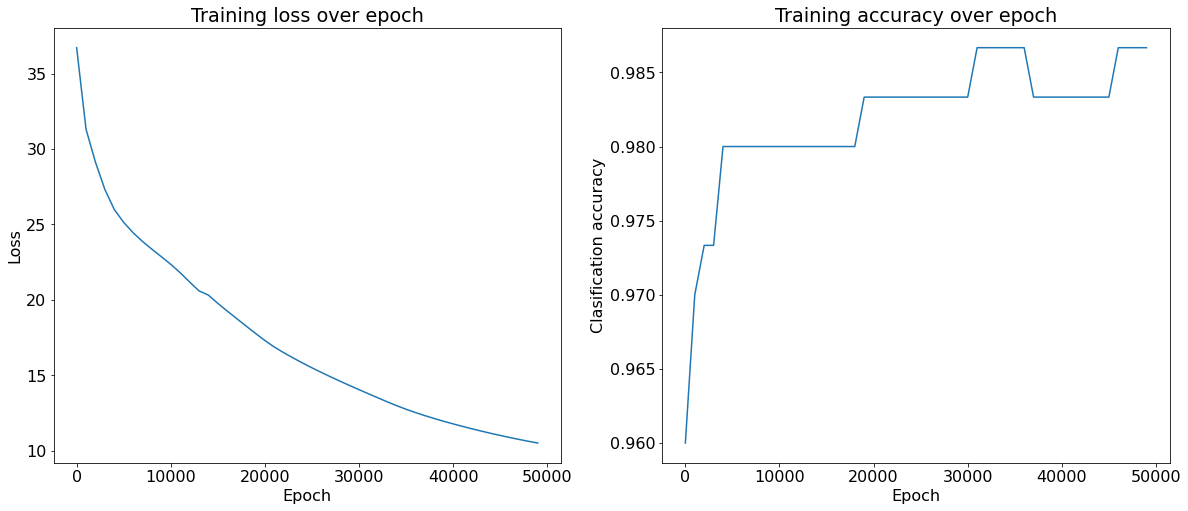

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

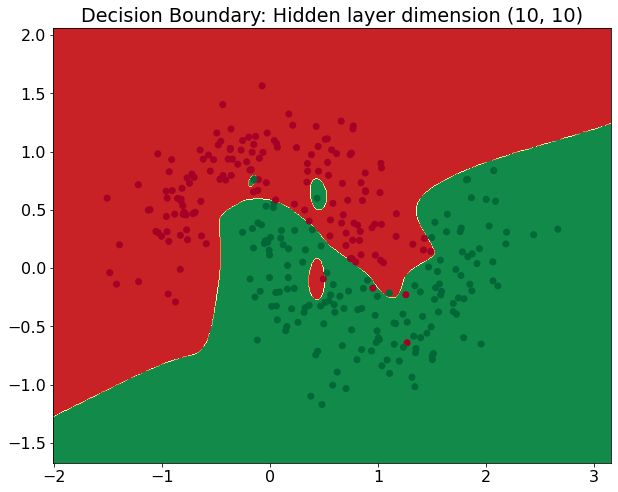

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

### Play with your networks
#### Capacity
Change the numbers of nodes in hidden layers as follows, and plot decision boundaries: (1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are the numbers of nodes in the first and second hidden layers, respectively.

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


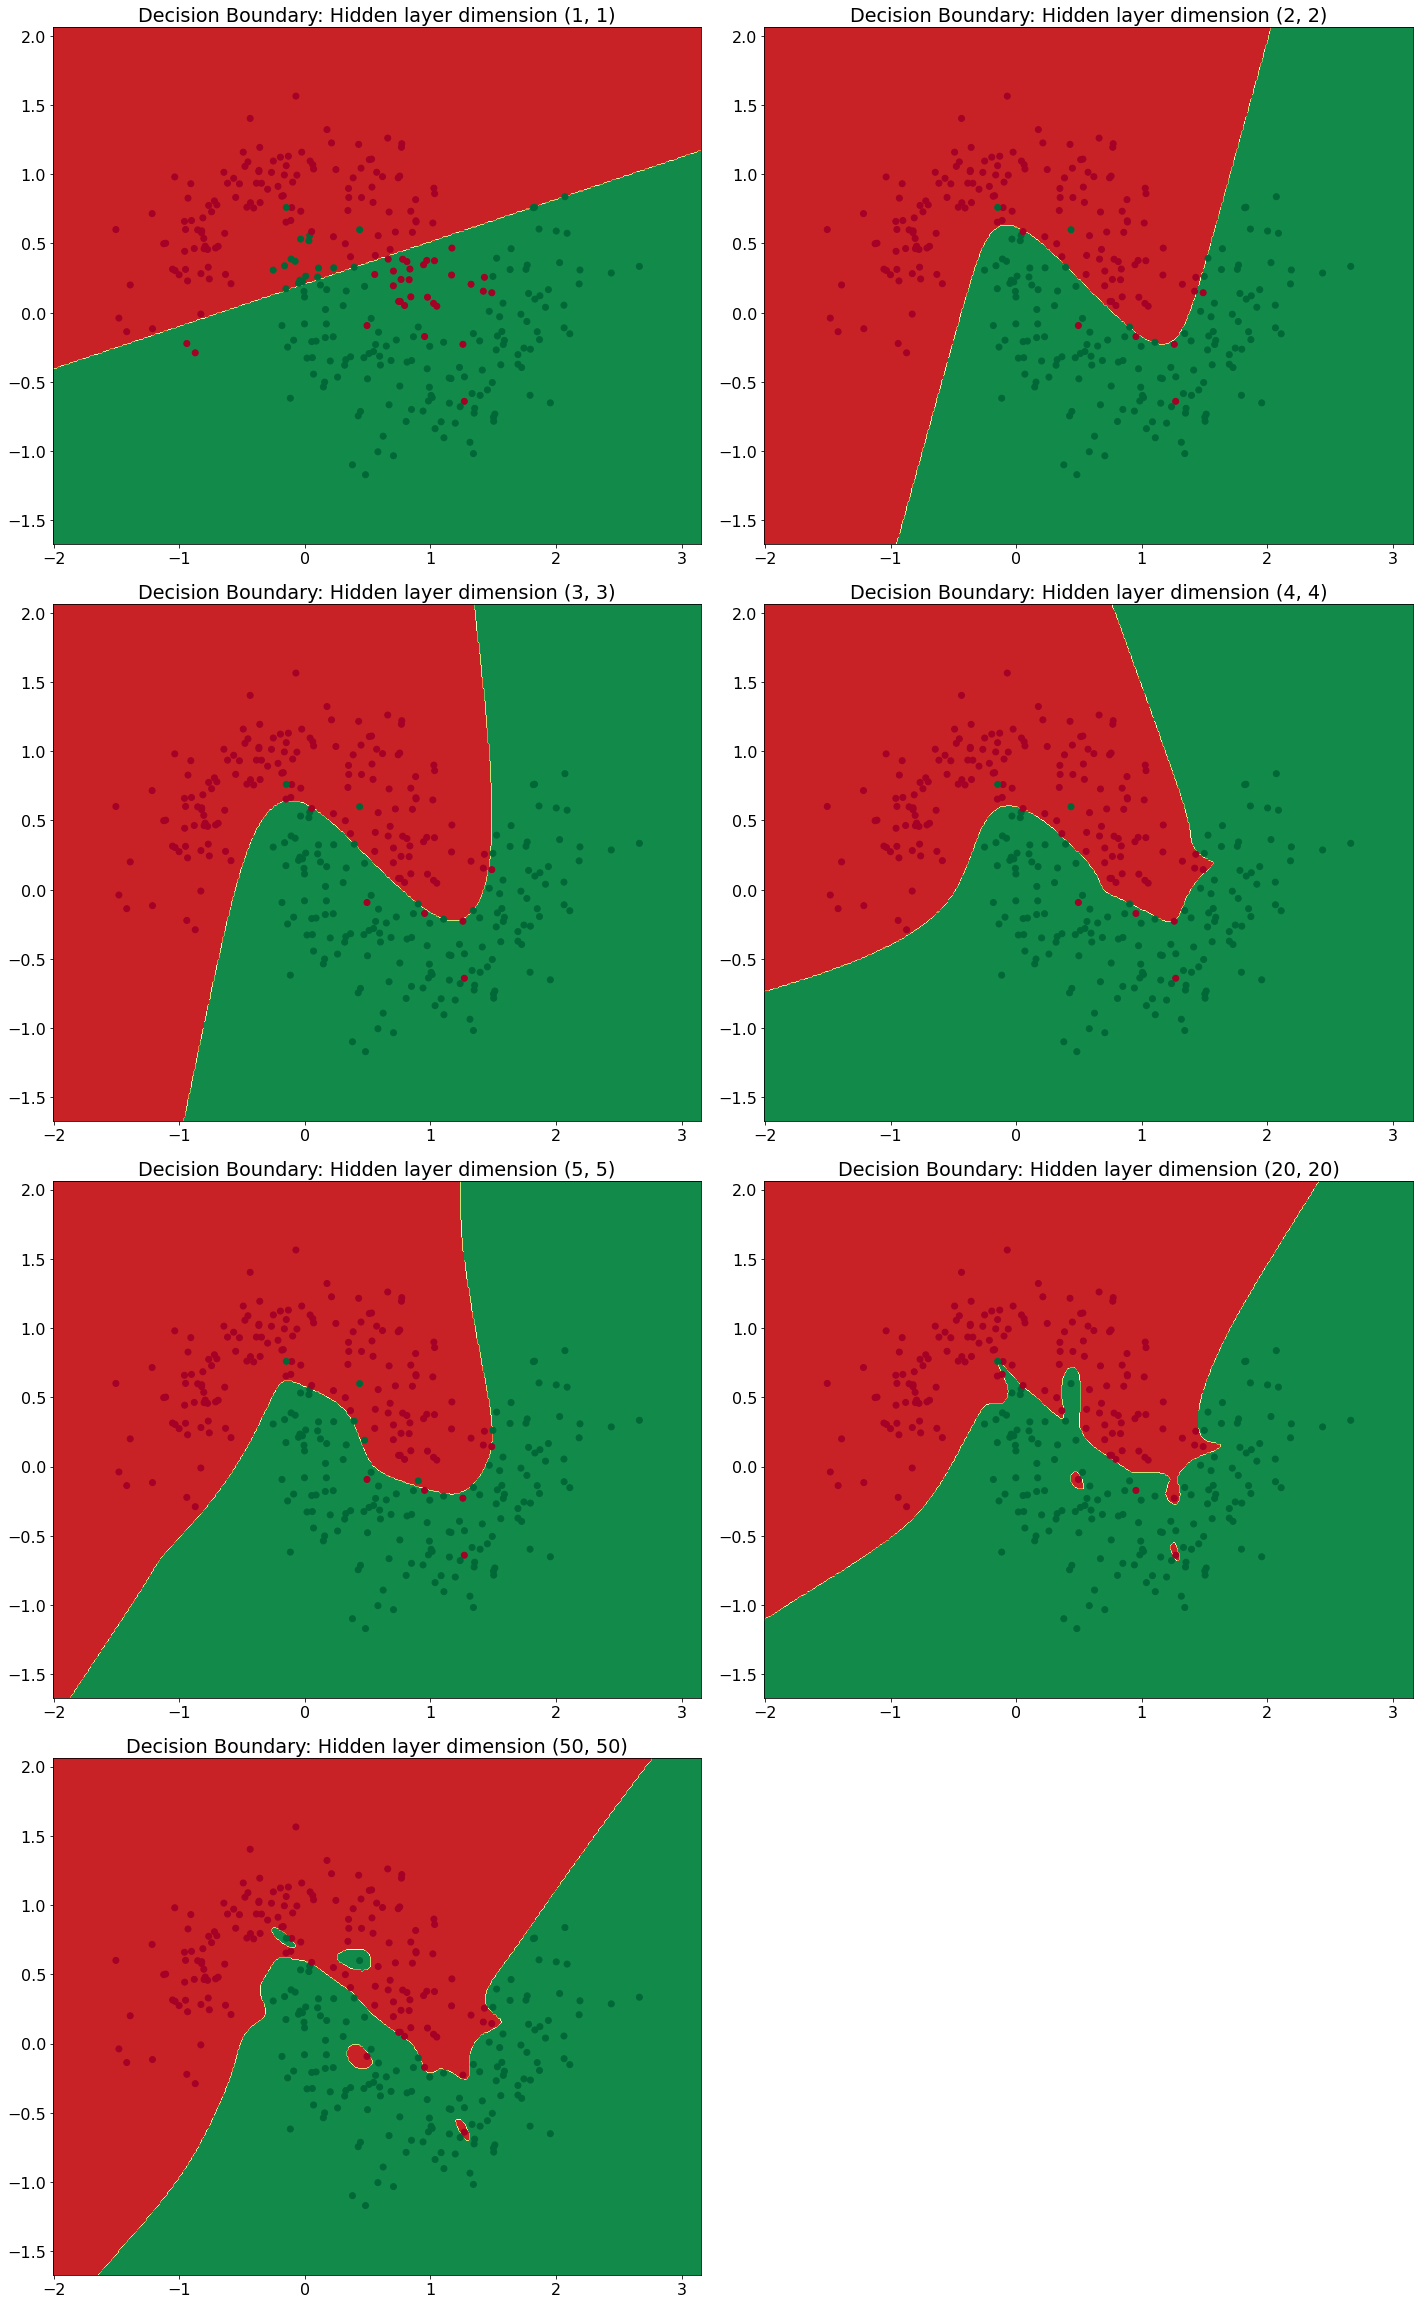

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

#### Regularization
Adjust the regularization coefficient as follows, and plot decision boundaries: \[0, 1e-5, 1e-3, 1e-1\].

Learning NN: Regularization 0 ... done
Learning NN: Regularization 1e-05 ... done
Learning NN: Regularization 0.001 ... done
Learning NN: Regularization 0.1 ... done


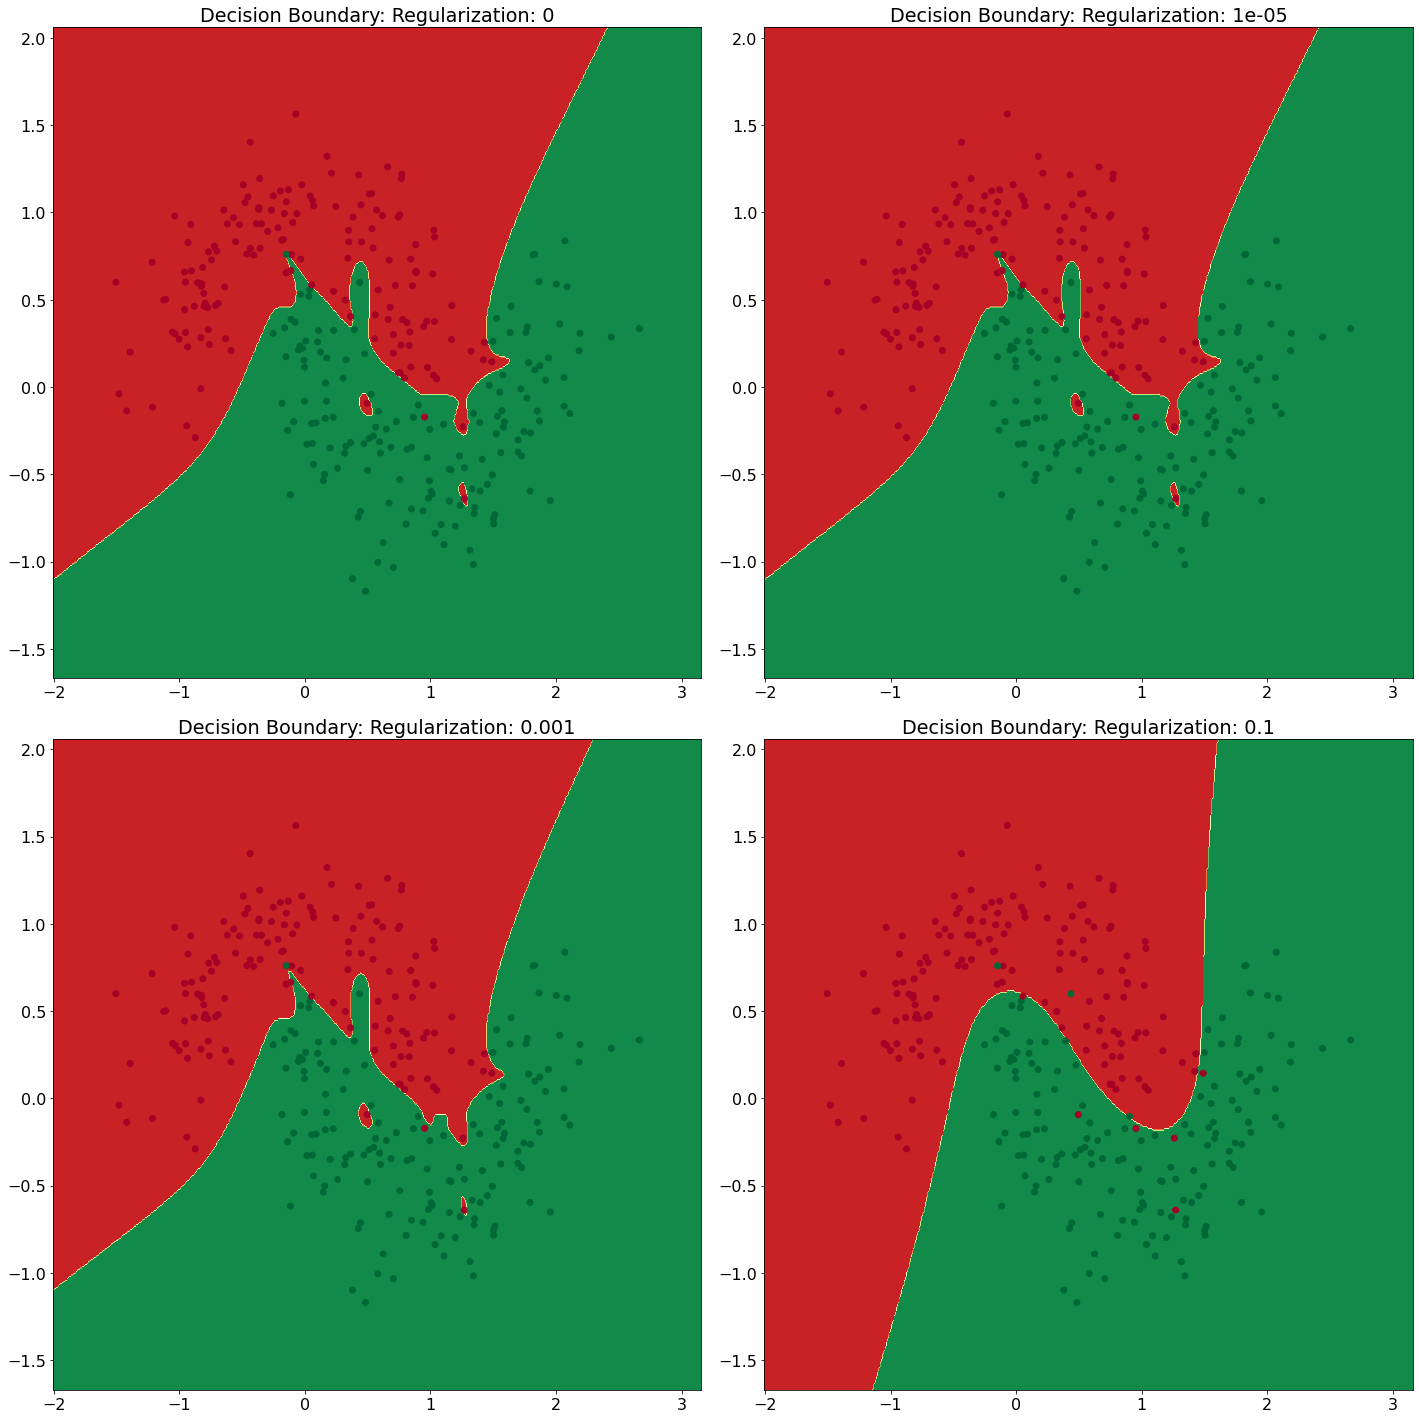

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 2
lr = 0.001 
epoch = 50000


L2_norm_list = [0, 1e-5, 1e-3, 1e-1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization: {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

#### Testing our NN on a complex synthetic dataset.

In [ ]:
X, y = make_spiral(n_samples_per_class=300, n_classes=4,
                    n_rotations=1.5, gap_between_spiral=0.7, noise=1.2,
                    gap_between_start_point=0.1, equal_interval=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

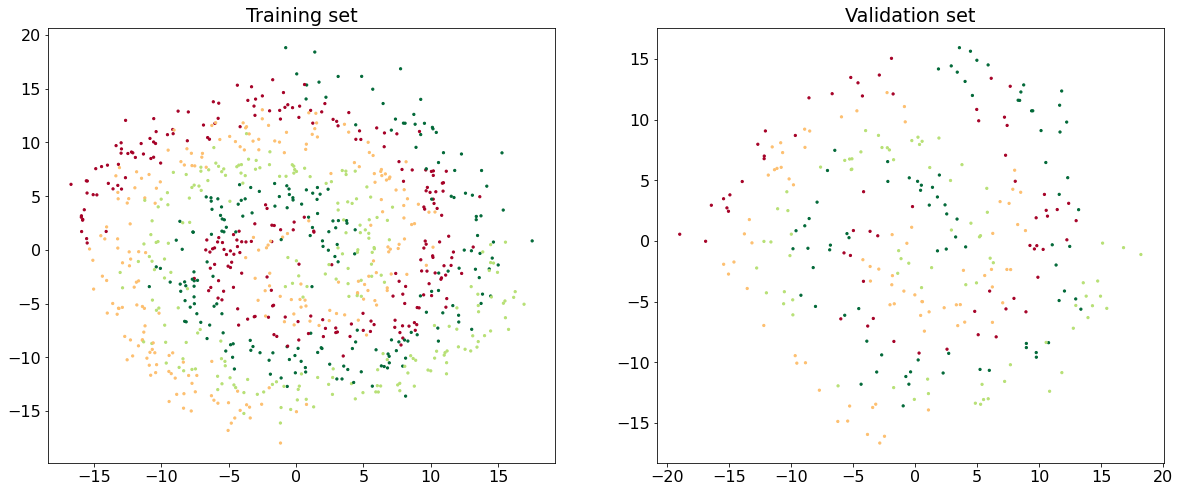

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], s = 5, c=y_train, cmap=plt.cm.RdYlGn)
plt.title('Training set')
plt.subplot(1, 2, 2)
plt.scatter(X_val[:,0], X_val[:,1], s = 5, c=y_val, cmap=plt.cm.RdYlGn)
plt.title('Validation set')
plt.gcf().set_size_inches(20, 8)

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 4
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.0001 
L2_norm = 0.1
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

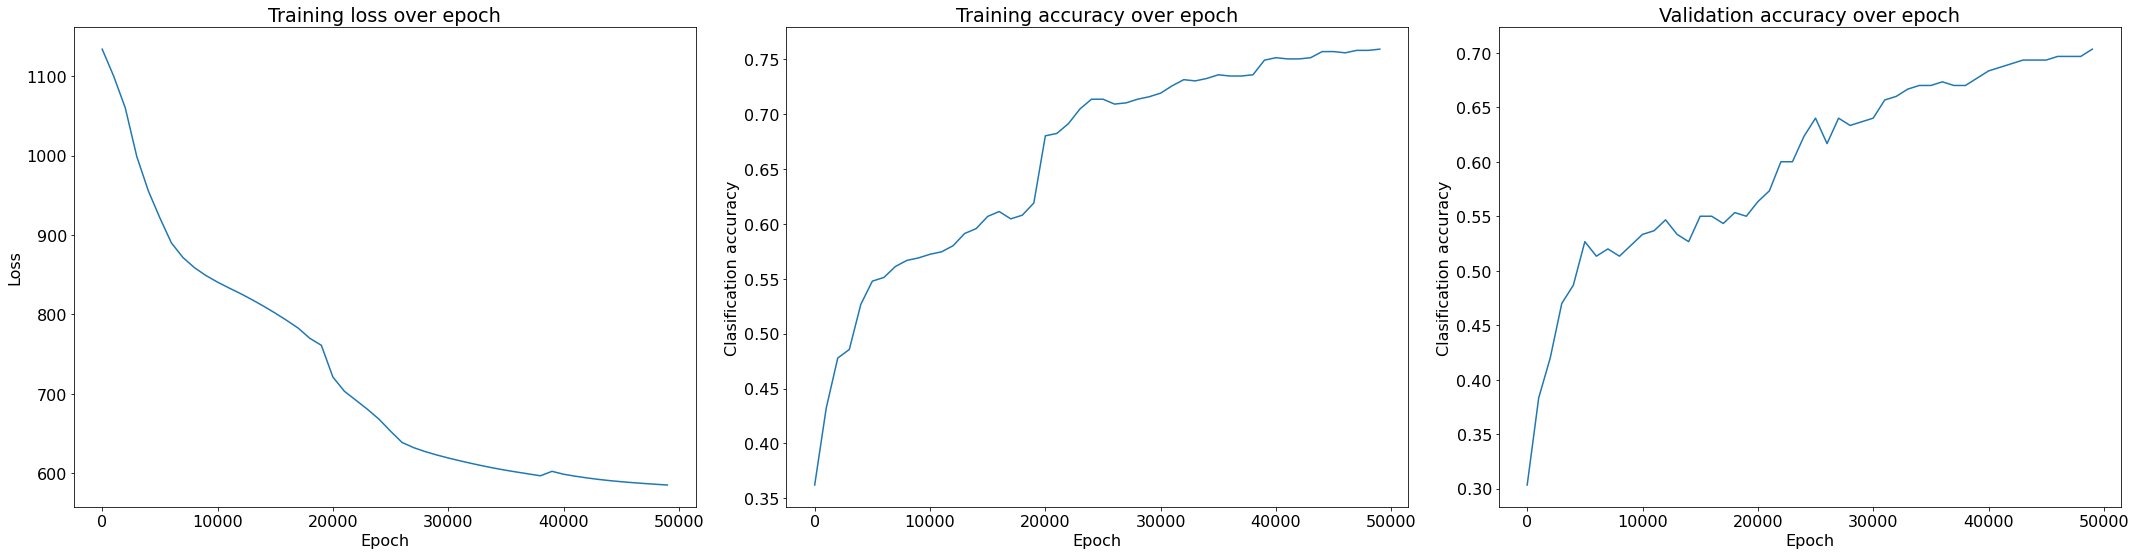

In [ ]:
plt.gcf().set_size_inches(30, 8)
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 3, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.subplot(1, 3, 3)
plt.plot(np.arange(len(stats['val_acc_history'])) * 1000, stats['val_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Validation accuracy over epoch')
plt.tight_layout()

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

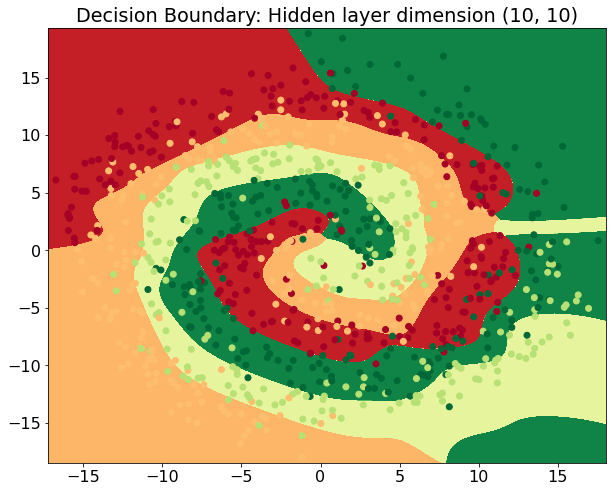

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation for a multilayer perceptron in both approaches (flat and modular codes)
- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.
- The effect of regularization with respect to the performance.
- The effect of learning rate with respect to the performance.
- Analysis of the above results 

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

__Explanation of your implementation for a multilayer perceptron in both approaches (flat and modular codes)__</br> + __exploit all functions you've written or make your own functions__

P1의 flat하게 구현된 NeuralNetwork
* forward_propagation, back_propagation을 numpy library를 활용하여 직접 계산한다. forward_propagation에서는 Input과 weight, bias를 linear하게 연산해준 후 activation function을 통과시켜 결과를 non-linear하게 만들어줄 수 있다. 또한 hidden layer에 그 결과를 다시 넣음으로써 더 좋은 feature를 생성해 결과를 예측할 수 있다. back_propagation에서는 각 layer의 weight와 bias를 learning한다. 방향은 forward와 달리 right to left로 gradient descent를 통해 학습한다. 이때 chain rule을 적용하여 loss에 대한 각 weight와 bias의 gradient를 구하여 학습한다.   

P2의 modular하게 구현된 NeuralNetwork
* forward_propagation, back_propagation가 여러 class로 구현된다 Linear, ReLU, Tanh, Sigmoid, SoftmaxWithCEloss class를 미리 구현해 놓음으로써, hidden layer를 늘리는 것에 있어 flexible하게 구현할 수 있다. 실제로 forward와 backward 함수를 구현함에 있어, 수학적으로 계산된 코딩을 하지 않고 미리 구현된 module을 사용함으로써 편리하게 NeuralNetwork를 생성할 수 있다.

* compute_loss : loss를 계산하는 함수로써, one hot encoding된 y값과 예측값을 곱한 값을 (또는 y값이 1인 인덱스와 동일한 예측값을) 로그와 마이너스를 취하여 loss에 계속 더함으로써 loss를 계산할 수 있다. 더하여, regularization을 해주기 위해 L2 norm term을 loss에 더해준다.

* train : 학습과정에서는 forward를 통해 backpropagation을 위한 변수들을 저장하고, loss를 계산할 수 있다. 저장된 변수를 back propagation과정에서 이용하여 weight와 bias를 update한다(optimization). 학습된 weight와 bias를 통해 예측값을 구함으로써 정답 data(validation data)와 비교하여 accuracy를 구할 수 있다(이때, predict함수를 이용하여 probability로 나타내어 있는 예측값을 0 또는 1로 바꾸어준다. 



__Random initialization vs Constant initialization__
 * NeuralNetwork model의 목적은 loss를 최소화하는 것, 파라미터를 최적화하는 것에 있고 이는 gradient descent 방법을 사용한다.
 * 이때, 각 파라미터에 대해 동일한 방법을 사용하여도 도달하는 최저점이 다를 수 있다. 그 파라미터가 많으면 많을수록 local minimum이 많아질 것이고, 모든 것이 global minimum에 도달하는 것은 힘들다. 하지만 local minimum에 도달하는 것도 충분히 의의가 있기 때문에 random하게 초기화한다.
 * 가중치를 constant로 초기화하는 경우, backpropagation에서 weight가 동일하게 갱신되어 학습이 제대로 이루어지지 않는다.

__Relationship between the number of hidden layers and decision boundary.__
* hidden layer의 개수는 P2-1의 Capacity에서 확인할 수 있듯이, Overfitting과 gradually non-linear로 설명할 수 있다.
* 특히 1일 때 linear하게 boundary가 형성되고, hidden layer의 개수가 많아질수록 non-linear하게 boundary가 형성되는 것을 확인할 수 있고, 또한 점점 data에 overfitting되는 것을 확인할 수 있다.


__The effect of regularization with respect to the performance.__

* regularization은 overfitting 문제를 피하기 위해 사용하는 방법으로, overfitting에 취약한 Neural Network에서 사용해야 한다. regularization은 학습데이터를 늘리거나, 히든 노드를 줄이거나, Weight decay(L2 regularization)을 취하거나, 학습을 일찍 종료하는 방법으로 진행할 수 있다.
* P2-1의 Regularization part의 plot을 통해 L2 norm의 값을 올려줌으로써 regularization을 함으로써 training data에 overfitting되는 것을 막아주는 것을 확인할 수 있다. 또한 아래의 Validation accuracy를 측정함에 있어 epoch가 늘어남에 따라 training accracy가 높아짐에도 overfitting되어  validation accuracy가 감소하지 않고 증가하는 것을 확인할 수 있다.

__The effect of learning rate with respect to the performance.__
* learning rate는 gradient descent를 통해 optimization을 할 때 minima에 도달하기 위해 얼마나 이동할지를 결정하는 변수이다. 만약 learning rate를 잘못 설정하면 minima에 도달하지 못할 수 있기 때문에 이를 잘 설정해 주어야한다.
* 만약 learning rate를 작게 설정하는 경우 학습시간이 오래걸리며 minima에 도달하지 못하고 saddle point에 멈추게 되는 경우가 존재한다.
* 반면 learning rate를 크게하는 경우 overshoot되어 diverge되거나 minima근처에서 oscilation이 발생할 수 있어 unstable하다.
* 따라서 learning rate를 적정히 설정하는 것은 optimization을 위해 중요하다. learning rate를 고정된 값으로 두지 않고 더 좋은 성능을 낼 수 있는 algorithms이 존재한다. Momentum, Adagrad, Adadelta, RMSProp, Adam이 그 예시이다. 

---

__ Constant initialization__

In [ ]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

In [ ]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 2
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="constant")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 208.06061927356106
Loss (epoch 2000): 208.02859907492572
Loss (epoch 3000): 207.96754288723056
Loss (epoch 4000): 207.78013379365507
Loss (epoch 5000): 205.65455772647246
Loss (epoch 6000): 144.4775498654432
Loss (epoch 7000): 115.64807481032715
Loss (epoch 8000): 102.6397563419196
Loss (epoch 9000): 98.11439930150102
Loss (epoch 10000): 97.39334806310686
Loss (epoch 11000): 97.16884114999706
Loss (epoch 12000): 97.04393342120215
Loss (epoch 13000): 96.95886896633489
Loss (epoch 14000): 96.89539932708959
Loss (epoch 15000): 96.84548383954451
Loss (epoch 16000): 96.80483638740711
Loss (epoch 17000): 96.77089483111189
Loss (epoch 18000): 96.7420043482284
Loss (epoch 19000): 96.71703471230936
Loss (epoch 20000): 96.69518092254556
Loss (epoch 21000): 96.67585071834532
Loss (epoch 22000): 96.65859697087737
Loss (epoch 23000): 96.64307492032854
Loss (epoch 24000): 96.62901398786333
Loss (epoch 25000): 96.61619856125601
Loss (epoch 26000): 96.60445453232965
Loss (epoch 2700